In [6]:
from wordle_game import *
from players import *

In [7]:
filename = 'official_word_bank.txt'
words = txt_to_set(filename)

In [8]:
player = RandomPlayer(words, 'monkey')
# player = HumanPlayer(words, 'logan')

In [9]:
word = 'grace'

In [5]:
guess_history = []
words_guessed = []
success = False
for i in range(6):  # six guesses
    print(f"Turn {i+1}")
    valid_options = remaining_options(words, guess_history)
    print(f'There are {len(valid_options)} possible words')
    if len(valid_options) <= 30:
        print(valid_options)
    
    guess = player.guess(guess_history)
    print(f"{player.name} guesses {guess}")
    if not guess_is_legal(words, guess):
        print(f'Illegal guess!')
        print(f'{player.name} cannot guess {guess}.')
        break
    
    result = get_result(word, guess)
    print(result)
    words_guessed.append(guess)
    guess_history.append((guess, result))

    if guess == word:
        print("Good Job!")
        print(f"{player.name} correctly guessed {word} in {i+1} guesses!")
        success = True
        break
if not success:
    print(f"{player.name} was not able to correctly guess {word} in 6 tries...")


Turn 1
There are 12972 possible words
monkey guesses buzzy
-----
Turn 2
There are 7557 possible words
monkey guesses infos
-----
Turn 3
There are 908 possible words
monkey guesses exeme
----G
Turn 4
There are 186 possible words
monkey guesses calve
YY--G
Turn 5
There are 5 possible words
{'apace', 'grace', 'trace', 'peace', 'ackee'}
monkey guesses ackee
YY--G
Turn 6
There are 3 possible words
{'trace', 'grace', 'peace'}
monkey guesses trace
-GGGG
monkey was not able to correctly guess grace in 6 tries...


# Use the player to solve wordle without knowing the starting word

In [6]:
guess_history = []
words_guessed = []
success = False
for i in range(6):  # six guesses
    print(f"Turn {i+1}")
    valid_options = remaining_options(words, guess_history)
    print(f'There are {len(valid_options)} possible words')
    if len(valid_options) <= 30:
        print(valid_options)
    
    guess = player.guess(guess_history)
    print(f"{player.name} guesses {guess}")
    if not guess_is_legal(words, guess):
        print(f'Illegal guess!')
        print(f'{player.name} cannot guess {guess}.')
        break
    
    # enter the result
    result = input(f"Enter the result for guess {i+1}: ")
    print(f"Result: {result}")
    words_guessed.append(guess)
    guess_history.append((guess, result))

    if result == 'GGGGG':
        print("Good Job!")
        print(f"{player.name} correctly guessed {word} in {i+1} guesses!")
        success = True
        break
if not success:
    print(f"{player.name} was not able to correctly guess {word} in 6 tries...")

Turn 1
There are 12972 possible words
monkey guesses maxed
Turn 2
There are 1068 possible words
monkey guesses fatal
Turn 3
There are 36 possible words
monkey guesses talar
Turn 4
There are 8 possible words
{'hault', 'vault', 'laith', 'laity', 'sault', 'lants', 'gault', 'lasts'}
monkey guesses laity
Turn 5
There are 4 possible words
{'hault', 'sault', 'gault', 'vault'}
monkey guesses vault
Good Job!
monkey correctly guessed grace in 5 guesses!


# Simulation to see how good the player is on all words

In [7]:
wins = 0
guess_counts = []
for w in words:
    outcome, guesses = play_game(words, w, player, verbose=False)
    guess_counts.append(len(guesses))
    if outcome:
        wins += 1
print(f"{player.name} won {round(wins/len(words) * 100, 4)}% of the games")
print(f"Average guesses: {round(sum(guess_counts) / len(guess_counts), 4)}")

monkey won 78.9007% of the games
Average guesses: 4.9423


# Visualizations

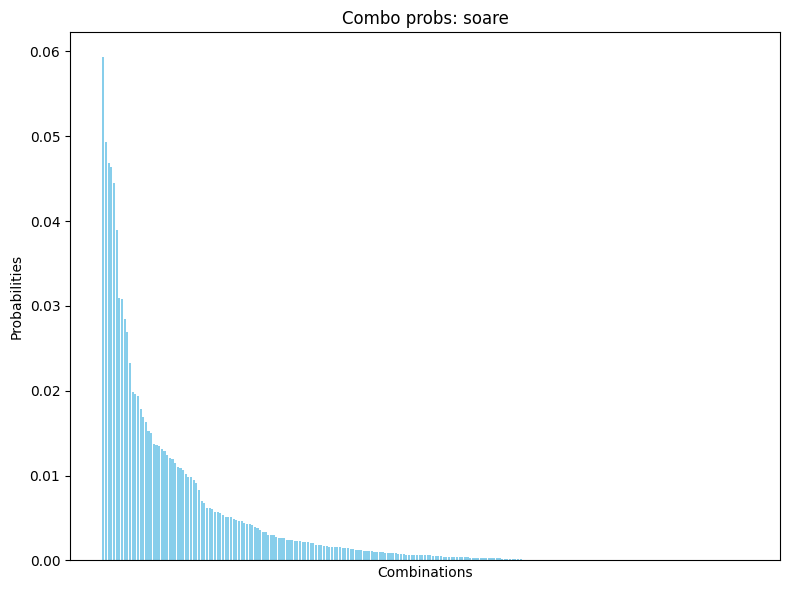

In [16]:
word='soare'
combo_probs = get_combo_probs(words, word)
combo_probs = {k: v for k, v in sorted(combo_probs.items(), key=lambda item: item[1], reverse=True)}

x = list(combo_probs.keys())
y = list(combo_probs.values())
plt.figure(figsize=(8, 6))
plt.bar(x, y, color='skyblue')
plt.xlabel("Combinations")
plt.xticks([])
plt.ylabel("Probabilities")
plt.title(f"Combo probs: {word}")
plt.tight_layout()
plt.show()